<a href="https://colab.research.google.com/github/KhosrojerdiA/Machine-Learning/blob/main/CNN_Happy_House_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops


%matplotlib inline
np.random.seed(1)

https://www.kaggle.com/datasets/iarunava/happy-house-dataset

#Data

In [ ]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

In [ ]:
load_dataset("/content/train_happy.h5", "/content/test_happy.h5")

(array([[[[178, 190, 163],
          [172, 181, 173],
          [188, 196, 184],
          ...,
          [255, 255, 254],
          [254, 255, 250],
          [249, 253, 222]],
 
         [[184, 201, 165],
          [149, 154, 142],
          [149, 158, 139],
          ...,
          [255, 255, 253],
          [254, 255, 250],
          [251, 255, 230]],
 
         [[198, 207, 165],
          [141, 147, 128],
          [168, 184, 154],
          ...,
          [253, 255, 244],
          [254, 255, 248],
          [253, 255, 233]],
 
         ...,
 
         [[ 77,  82,  89],
          [ 60,  64,  68],
          [ 49,  53,  55],
          ...,
          [ 31,  32,  30],
          [ 47,  48,  46],
          [ 75,  75,  75]],
 
         [[ 68,  71,  76],
          [ 55,  58,  59],
          [ 44,  47,  47],
          ...,
          [ 30,  31,  29],
          [ 40,  41,  39],
          [ 63,  64,  63]],
 
         [[ 61,  64,  66],
          [ 52,  54,  54],
          [ 45,  47,  46],
   

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("/content/train_happy.h5", "/content/test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


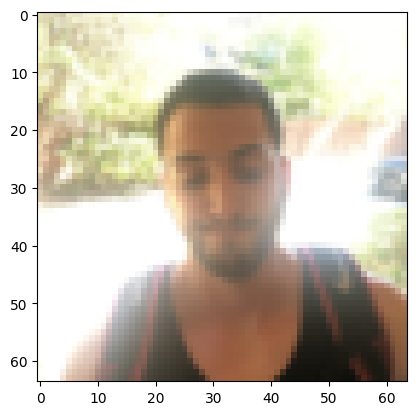

In [ ]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

#Model

In [ ]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tf.keras.layers.ZeroPadding2D(padding=(3,3),input_shape=(64, 64, 3), data_format="channels_last"),

            ## Conv2D with 32 7x7 filters and stride of 1
            tf.keras.layers.Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0'),
            ## BatchNormalization for axis 3
            tf.keras.layers.BatchNormalization(axis = 3, name = 'bn0'),
            ## ReLU
            tf.keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
            ## Max Pooling 2D with default parameters
            tf.keras.layers.MaxPooling2D((2, 2), name='max_pool0'),
            ## Flatten layer
            tf.keras.layers.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(1, activation='sigmoid', name='fc'),
            # YOUR CODE STARTS HERE


            # YOUR CODE ENDS HERE
        ])

    return model

In [ ]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv0 (Conv2D)              (None, 64, 64, 32)        4736      
                                                                 
 bn0 (BatchNormalization)    (None, 64, 64, 32)        128       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pool0 (MaxPooling2D)    (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                        

In [ ]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 9ms/step - loss: 1.0476 - accuracy: 0.7167
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2051 - accuracy: 0.9217
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1199 - accuracy: 0.9600
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0985 - accuracy: 0.9583
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0883 - accuracy: 0.9733
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1337 - accuracy: 0.9467
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0668 - accuracy: 0.9800
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1467 - accuracy: 0.9550
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1158 - accuracy: 0.9567
Epoch 10/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1010 - accuracy: 0.9617


In [ ]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 23ms/step - loss: 0.2602 - accuracy: 0.8733


[0.26019006967544556, 0.8733333349227905]

#Load the SIGNS Dataset

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

In [ ]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    # Z1 = None
    ## RELU
    # A1 = None
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    # P1 = None
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    # Z2 = None
    ## RELU
    # A2 = None
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    # P2 = None
    ## FLATTEN
    # F = None
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'"
    # outputs = None
    # YOUR CODE STARTS HERE
    Z1 = tf.keras.layers.Conv2D(filters = 8 , kernel_size= (4,4), strides = (1,1), padding='same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=(8, 8), padding='same')(A1)
    Z2 = tf.keras.layers.Conv2D(filters = 16 , kernel_size= (2,2), strides = (1,1), padding='same')(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4, 4), padding='same')(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)

    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

In [ ]:
history.history
{'loss': [1.836954116821289,
  1.7926363945007324,
  1.7886472940444946,
  1.7850253582000732,

In [ ]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on.
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

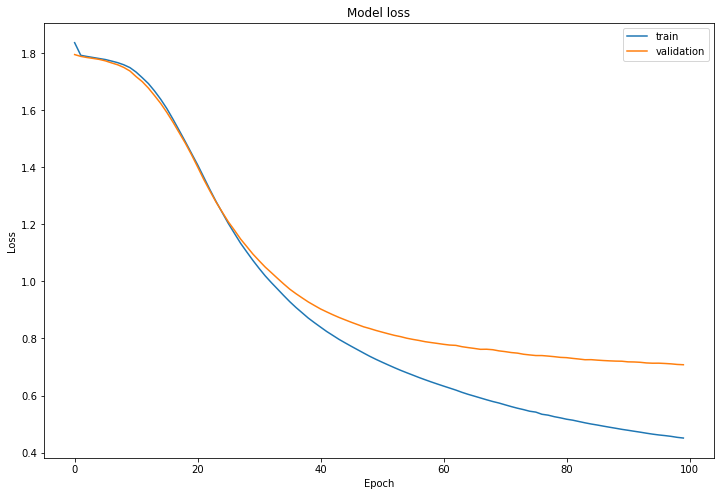

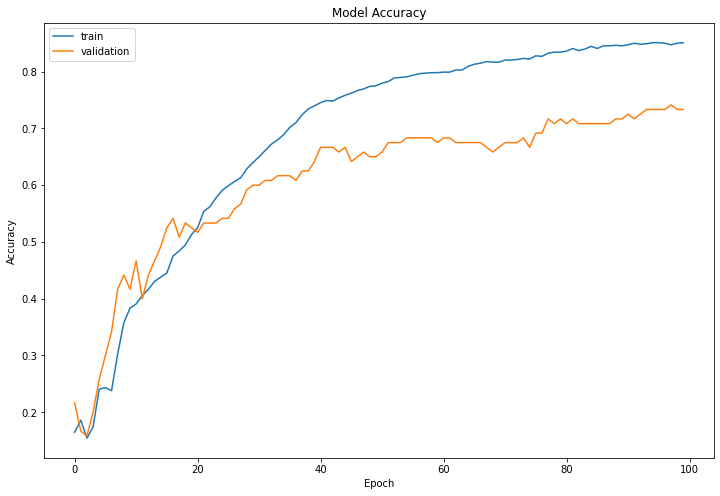